## Import

In [21]:
import pandas as pd

df = pd.read_csv('covid_combined_data.csv')
countries_df = pd.read_csv('countries_data.csv')

In [40]:
df.head()

,location_key,subregion1_code_x,subregion1_name_x,date,country_name_x,new_confirmed,cumulative_confirmed,new_tested,cumulative_tested,subregion1_code_y,...,cumulative_deceased,subregion1_code,subregion1_name,country_name,new_persons_vaccinated,cumulative_persons_vaccinated,new_persons_fully_vaccinated,cumulative_persons_fully_vaccinated,new_vaccine_doses_administered,cumulative_vaccine_doses_administered
0,AR_P,P,Formosa,2021-03-17,Argentina,20,1717,1695,98924,P,...,25,P,Formosa,Argentina,1407,13392,204,3190,1611,16582
1,IN_MN,MN,Manipur,2021-02-21,India,4,29237,891,542337,MN,...,373,MN,Manipur,India,0,40215,0,1711,0,41926
2,FR_PAC,PAC,Provence-Alpes-Côte d'Azur,2021-01-20,France,2715,269200,37212,4224725,PAC,...,4133,PAC,Provence-Alpes-Côte d'Azur,France,12017,61699,72,381,12089,62080
3,FR_PDL,PDL,Pays de la Loire,2021-08-02,France,922,243519,30186,5126940,PDL,...,2746,PDL,Pays de la Loire,France,21016,2527043,21470,2119516,42486,4646559
4,AR_A_035,A,Salta,2022-01-26,Argentina,26,5316,44,12177,A,...,91,A,Salta,Argentina,17,19361,34,16350,51,35711


In [41]:
df.describe()

,new_confirmed,cumulative_confirmed,new_tested,cumulative_tested,new_deceased,cumulative_deceased,new_persons_vaccinated,cumulative_persons_vaccinated,new_persons_fully_vaccinated,cumulative_persons_fully_vaccinated,new_vaccine_doses_administered,cumulative_vaccine_doses_administered
count,325367.000000,3.253670e+05,3.253670e+05,3.253670e+05,325367.000000,325367.000000,3.253670e+05,3.253670e+05,3.253670e+05,3.253670e+05,3.253670e+05,3.253670e+05
mean,381.005283,1.099699e+05,5.474534e+03,1.676088e+06,4.076123,1675.994028,3.781921e+03,5.925947e+05,2.208315e+03,3.463255e+05,6.179453e+03,9.724927e+05
std,2734.034323,6.199122e+05,3.883670e+04,1.524132e+07,31.631435,8128.573545,3.124585e+04,3.227735e+06,1.651914e+04,1.854523e+06,4.427505e+04,4.974855e+06
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000,1.986000e+03,1.100000e+01,5.419000e+03,0.000000,36.000000,3.000000e+00,4.193000e+03,2.000000e+00,1.665000e+03,1.000000e+01,6.390000e+03
50%,13.000000,9.467000e+03,7.900000e+01,3.278300e+04,0.000000,158.000000,3.300000e+01,1.875000e+04,2.400000e+01,1.101300e+04,9.300000e+01,3.031300e+04
75%,92.000000,4.643850e+04,1.037000e+03,3.562120e+05,1.000000,731.000000,3.650000e+02,1.518040e+05,2.920000e+02,9.956450e+04,8.830000e+02,2.626655e+05
max,453628.000000,1.988171e+07,5.177367e+06,4.919890e+08,3971.000000,165806.000000,2.906100e+06,9.812546e+07,1.516634e+06,4.266619e+07,3.633814e+06,1.307498e+08


In [39]:
countries_df.head()

,location_key,subregion1_code,subregion1_name,country_code,country_name,iso_3166_1_alpha_2,iso_3166_1_alpha_3,population,population_male,population_female,population_density,human_development_index,gdp_usd,gdp_per_capita_usd,latitude,longitude,area_sq_km,health_expenditure_usd,out_of_pocket_health_expenditure_usd
0,AT,NaN,NaN,AT,Austria,AT,AUT,8858775,4357033,4501742,107.100,0.908,455140042000,51448,48.000000,14.000000,83879,4939.875488,948.617432
1,AU,NaN,NaN,AU,Australia,AU,AUS,25499881,12698625,12801256,3.319,0.939,1392680589329,54907,-28.000000,137.000000,7741220,5331.817871,967.837036
2,BY,NaN,NaN,BY,Belarus,BY,BLR,9449321,4399367,5049954,46.569,0.798,63080457022,6663,53.528333,28.046667,207600,342.499908,94.238846
3,HN,NaN,NaN,HN,Honduras,HN,HND,9904608,4948880,4955728,88.521,0.606,25095395475,2574,14.633333,-86.816667,112490,195.935745,95.423988
4,MH,NaN,NaN,MH,Marshall Islands,MH,MHL,59194,28373,27502,328.856,0.708,221278000,3788,9.820000,169.290000,180,642.199158,79.719673


In [42]:
countries_df.describe()

,subregion1_code,subregion1_name,population,population_male,population_female,population_density,human_development_index,gdp_usd,gdp_per_capita_usd,latitude,longitude,area_sq_km,health_expenditure_usd,out_of_pocket_health_expenditure_usd
count,0.0,0.0,1.750000e+02,1.750000e+02,1.750000e+02,175.000000,175.000000,1.750000e+02,175.000000,175.000000,175.000000,1.750000e+02,175.000000,175.000000
mean,NaN,NaN,4.342117e+07,2.189922e+07,2.150238e+07,211.725651,0.703863,4.892442e+11,14174.074286,17.819279,19.085321,7.432280e+05,1065.702797,231.142308
std,NaN,NaN,1.552209e+08,7.990412e+07,7.533835e+07,679.334219,0.151796,2.029130e+12,19251.215740,24.354425,66.395424,2.011080e+06,1792.391199,348.146730
min,NaN,NaN,1.809200e+04,1.467900e+04,1.375900e+04,2.110000,0.354000,1.946472e+08,261.000000,-41.200000,-174.810278,1.800000e+02,19.431646,0.192364
25%,NaN,NaN,2.288676e+06,1.135976e+06,1.089088e+06,32.769500,0.588000,1.117086e+10,1883.500000,2.640256,-10.375000,2.794000e+04,77.716579,27.664524
50%,NaN,NaN,9.890400e+06,4.852366e+06,5.037161e+06,83.286000,0.732000,4.076114e+10,6001.000000,15.500000,20.900000,1.476300e+05,320.593292,92.700966
75%,NaN,NaN,3.195542e+07,1.600543e+07,1.583639e+07,203.081000,0.820500,2.432044e+11,17595.500000,38.541667,50.881939,5.810500e+05,1102.854370,258.327500
max,NaN,NaN,1.439324e+09,7.382473e+08,7.010764e+08,8357.633000,0.957000,2.137442e+13,116348.000000,66.416667,178.000000,1.709825e+07,10246.138672,2882.037109


## Część 1

1. Wykonaj wykresy pudełkowe (ang.box plot), które pozwolą na graficzną identyfikację wartości odstających poprzez przedstawienie kwartyli i wartości skrajnych w danych dotyczących:

1.1. liczby nowych zachorowań

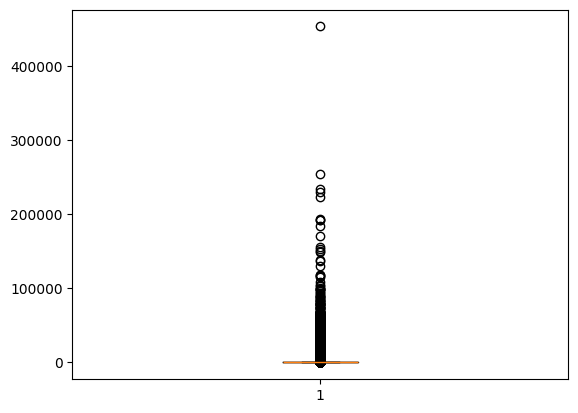

In [23]:
import matplotlib.pyplot as plt
plt.boxplot(df['new_confirmed'])
plt.show()

1.2. liczby nowych śmierci



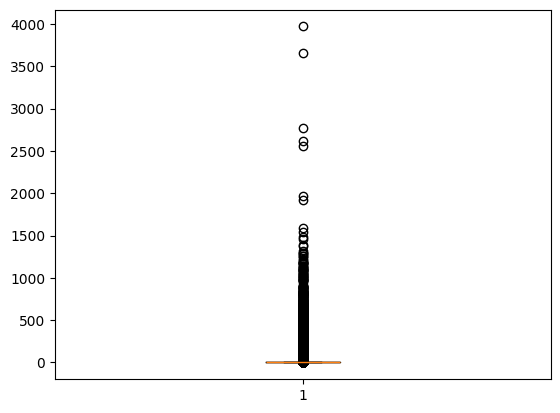

In [24]:
plt.boxplot(df['new_deceased'])
plt.show()

1.3. liczby nowych szczepień



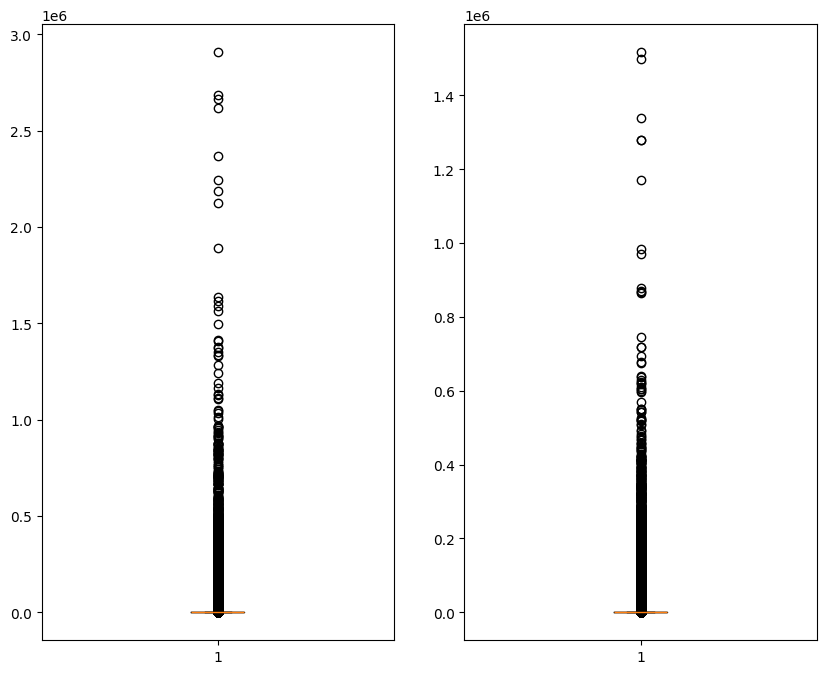

In [43]:
fig, ax = plt.subplots(1, 2, figsize=(10, 8))
ax[0].boxplot(df['new_persons_vaccinated'])
ax[1].boxplot(df['new_persons_fully_vaccinated'])
plt.show()


1.4. populacji



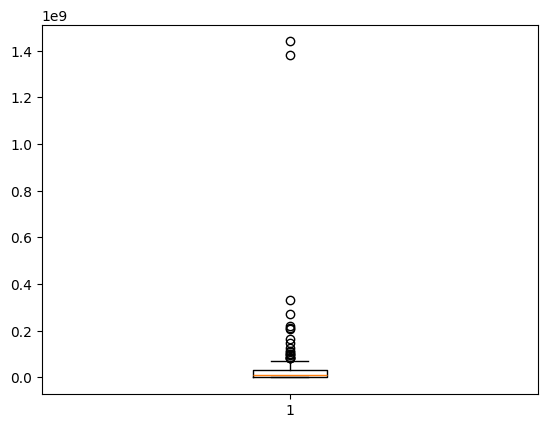

In [27]:
plt.boxplot(countries_df['population']);

1.5. PKB



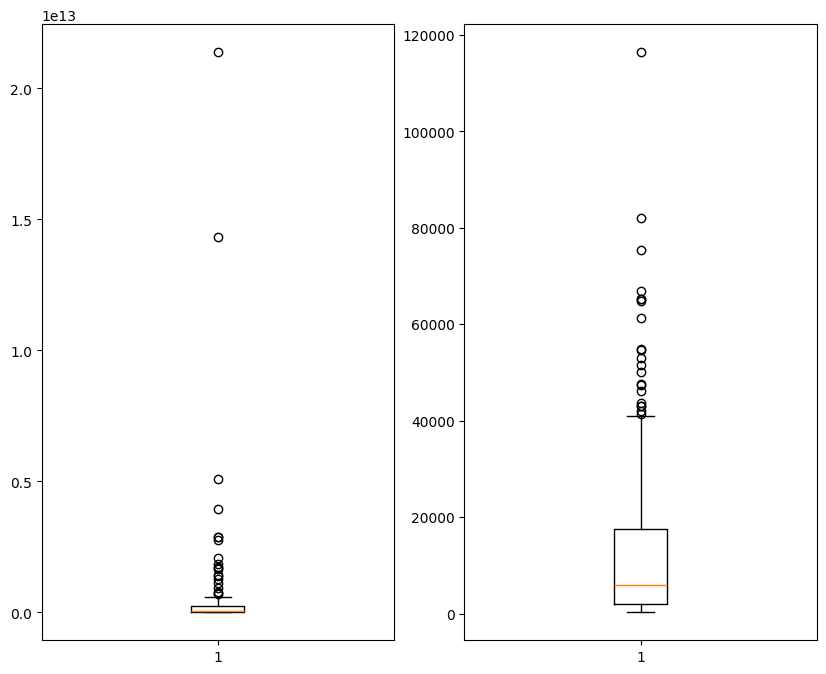

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(10, 8))
ax[0].boxplot(countries_df['gdp_usd'])
ax[1].boxplot(countries_df['gdp_per_capita_usd'])
plt.show()

1.6.1 Wydatki na służbę zdrowia

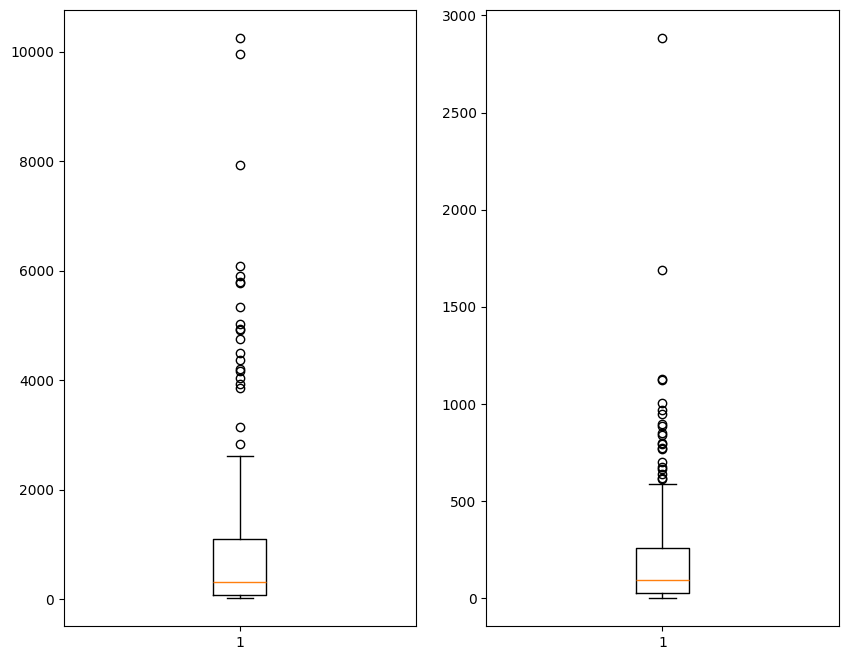

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(10, 8))
ax[0].boxplot(countries_df['health_expenditure_usd'])
ax[1].boxplot(countries_df['out_of_pocket_health_expenditure_usd'])
plt.show()

1.6.2 Zaaplikowane dawki szczepionek

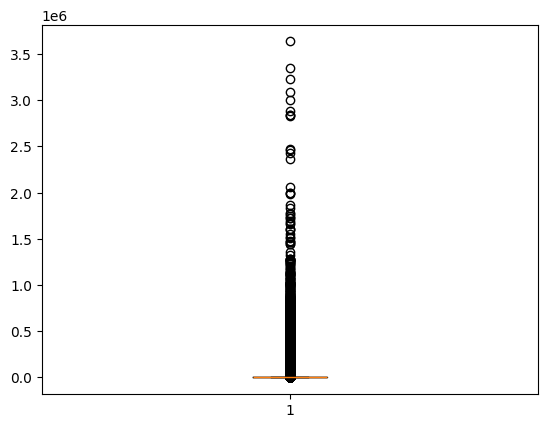

In [36]:
plt.boxplot(df['new_vaccine_doses_administered']);
plt.show()

1.6.3 liczba nowych osób przetestowanych

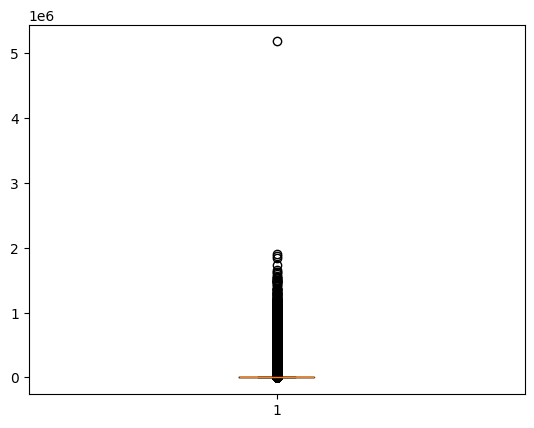

In [44]:
plt.boxplot(df['new_tested']);
plt.show()

1.6.4 ??

## Część 3

3.1. średnia liczba nowych zachorowań, śmierci i szczepień dla co najmniej 10 wybranych krajów w wybranym miesiącu